# Week 5& 6 - Project Milestone2 (Koppula Veera Reddy)

In [3]:
#Load the necessary libraries
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt

###### Boston housing dataset was presented in same folder. Once loaded, checking the top 10 records.

In [4]:
#Read in the Boston housing dataset (given as a .csv file) from the local directory
df=pd.read_csv("COVID-19_CDC_data.csv")

/Users/veerareddykoppula/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Error Pops due to errored columns - we are going to clean the error load in next steps

In [6]:
#Check the first 10 records.
df.head(10)

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-11,IN,18.0,POSEY,18129.0,0 - 17 years,NaN,NaN,NaN,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
1,2021-03,KY,21.0,WOODFORD,21239.0,0 - 17 years,NaN,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
2,2020-08,MI,26.0,ANTRIM,26009.0,18 to 49 years,NaN,NaN,NaN,NaN,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
3,2021-07,WA,53.0,ASOTIN,53003.0,18 to 49 years,NaN,NaN,NaN,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Missing,Yes
4,2020-07,WI,55.0,IOWA,55049.0,18 to 49 years,NaN,NaN,NaN,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Unknown,Missing,Unknown,NaN
5,2021-06,PA,42.0,VENANGO,42121.0,50 to 64 years,NaN,NaN,NaN,NaN,NaN,Missing,Missing,Probable Case,Unknown,Unknown,Unknown,NaN,NaN
6,2020-12,KY,21.0,BULLITT,21029.0,0 - 17 years,Female,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,NaN,NaN
7,2020-12,IL,17.0,CLINTON,17027.0,0 - 17 years,Female,Missing,Missing,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN
8,2021-05,MA,25.0,FRANKLIN,25011.0,0 - 17 years,Female,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,NaN,NaN
9,2020-12,IN,18.0,LAWRENCE,18093.0,0 - 17 years,Female,NaN,NaN,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN


In [7]:
#Find the total number of records
df.shape

(32806678, 19)

## Replacing the header

In [8]:
#Create a script that will read dictionary file line by line to create header list.
text_file = []
with open('Covid_CDC_Headers.txt','r') as f:
    for line in f:
        f.readline()
        var=line.split(":")[0]
        text_file.append(var)

text_file

['Case Month',
 'State',
 'State Code',
 'County',
 'County Code',
 'Age Group',
 'Sex',
 'Race',
 'Ethinicity',
 'Case Positive Interval',
 'Case Onset Interval',
 'Identification Process',
 'Exposure',
 'Current Status',
 'Symptoms Shown',
 'Hospitalized',
 'ICU Admittance',
 'Death',
 'Underlying Conditions']

## Replace Header & Format data into a more readable format, with fixing errors

In [21]:
#Header Replace with row0 dropped & previous errors in load are cleaned
df = pd.read_csv("COVID-19_CDC_data.csv",names=text_file, error_bad_lines=False, index_col=False, dtype='unicode')
df.drop(0, inplace=True)
df.head()

,Case Month,State,State Code,County,County Code,Age Group,Sex,Race,Ethinicity,Case Positive Interval,Case Onset Interval,Identification Process,Exposure,Current Status,Symptoms Shown,Hospitalized,ICU Admittance,Death,Underlying Conditions
1,2020-11,IN,18,POSEY,18129,0 - 17 years,NaN,NaN,NaN,0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
2,2021-03,KY,21,WOODFORD,21239,0 - 17 years,NaN,NaN,NaN,NaN,0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
3,2020-08,MI,26,ANTRIM,26009,18 to 49 years,NaN,NaN,NaN,NaN,0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
4,2021-07,WA,53,ASOTIN,53003,18 to 49 years,NaN,NaN,NaN,0,0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Missing,Yes
5,2020-07,WI,55,IOWA,55049,18 to 49 years,NaN,NaN,NaN,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Unknown,Missing,Unknown,NaN


## Identify outliers and bad data On additional Columns

In [22]:
#Summary of the data with null values in each column
df.isnull().sum()

Case Month                       4
State                          678
State Code                     678
County                     1875515
County Code                1875515
Age Group                   377973
Sex                        1020368
Race                       5846875
Ethinicity                 6806875
Case Positive Interval    23006281
Case Onset Interval       17671972
Identification Process           0
Exposure                         0
Current Status                   0
Symptoms Shown                   0
Hospitalized                     0
ICU Admittance                   0
Death                      1595858
Underlying Conditions     30795980
dtype: int64

In [24]:
size_orig = df.shape
size_orig

(32806678, 19)

In [25]:
df_orig = df
#Stripping none values in visit column and saving back to current data set
df.dropna(inplace=True)
#calculating size of the data after clean-up
size_cleaned = df.shape

In [26]:
print("The size of previous data was - {prev[0]} rows and the size of the new one is - {after[0]} rows".
      format(prev=size_orig, after=size_cleaned))

The size of previous data was - 32806678 rows and the size of the new one is - 789393 rows


In [28]:
df.head()

,Case Month,State,State Code,County,County Code,Age Group,Sex,Race,Ethinicity,Case Positive Interval,Case Onset Interval,Identification Process,Exposure,Current Status,Symptoms Shown,Hospitalized,ICU Admittance,Death,Underlying Conditions
45,2021-01,WA,53,BENTON,53005,0 - 17 years,Female,Missing,Hispanic/Latino,0,0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,No,Missing,Yes
54,2020-04,KS,20,FORD,20057,18 to 49 years,Male,Unknown,Hispanic/Latino,1,0,Clinical evaluation,Yes,Laboratory-confirmed case,Symptomatic,No,No,No,Yes
147,2021-01,NC,37,MONTGOMERY,37123,18 to 49 years,Male,White,Hispanic/Latino,0,0,Missing,Unknown,Laboratory-confirmed case,Symptomatic,No,Unknown,No,Yes
201,2020-05,NC,37,SAMPSON,37163,0 - 17 years,Female,White,Hispanic/Latino,1,0,Missing,Unknown,Laboratory-confirmed case,Symptomatic,No,Unknown,No,Yes
251,2020-11,WA,53,SPOKANE,53063,0 - 17 years,Female,Missing,Hispanic/Latino,0,0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,Missing,Yes


## Fix casing or inconsistent values

In [29]:
df = df[(df.Race != 'Unknown') & (df.Race != 'Missing')]
df.isnull().sum()

Case Month                0
State                     0
State Code                0
County                    0
County Code               0
Age Group                 0
Sex                       0
Race                      0
Ethinicity                0
Case Positive Interval    0
Case Onset Interval       0
Identification Process    0
Exposure                  0
Current Status            0
Symptoms Shown            0
Hospitalized              0
ICU Admittance            0
Death                     0
Underlying Conditions     0
dtype: int64

In [30]:
size_cleaned = df.shape
print("The size of previous data was - {prev[0]} rows and the size of the new one is - {after[0]} rows".
      format(prev=size_orig, after=size_cleaned))

The size of previous data was - 32806678 rows and the size of the new one is - 731068 rows


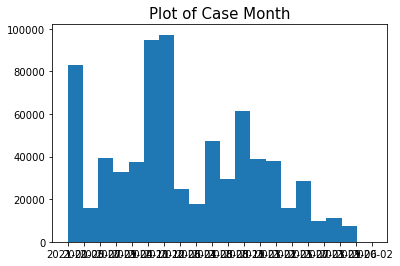

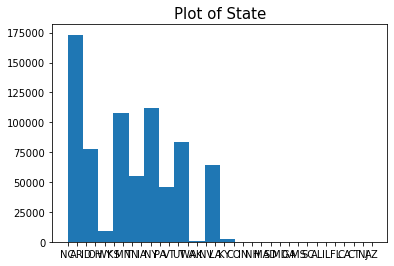

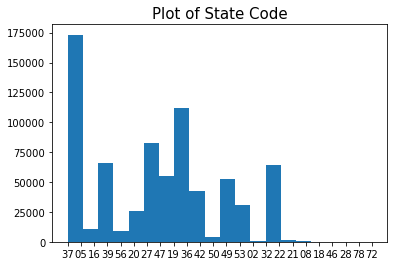

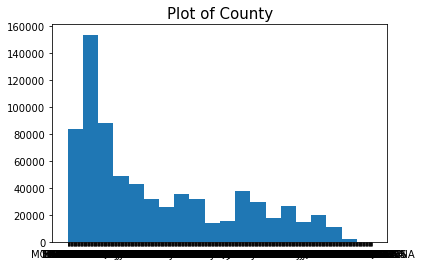

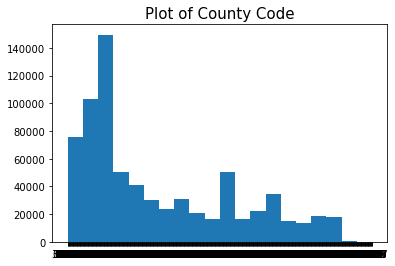

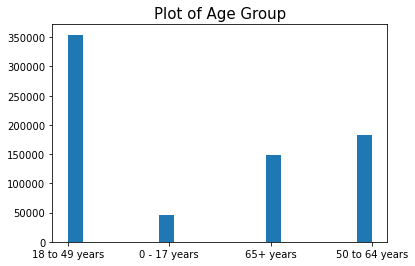

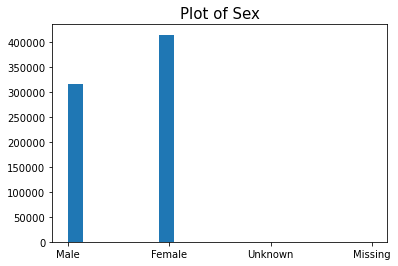

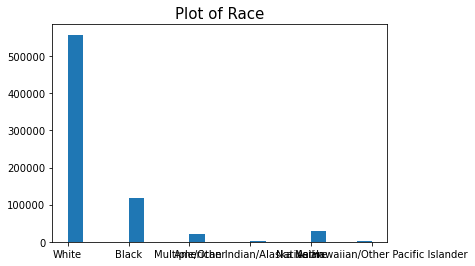

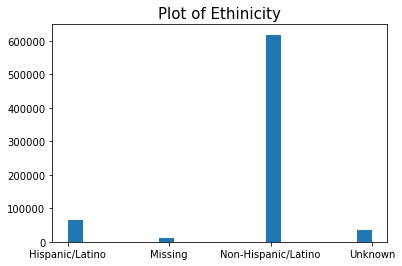

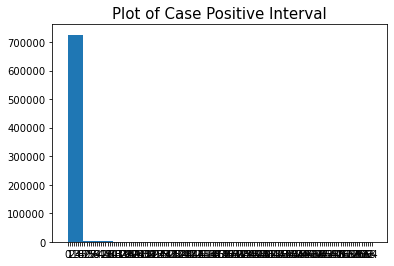

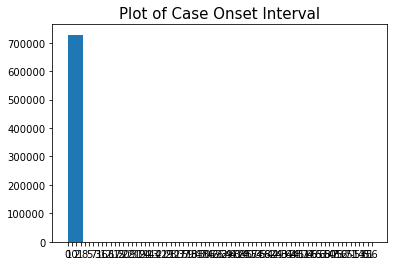

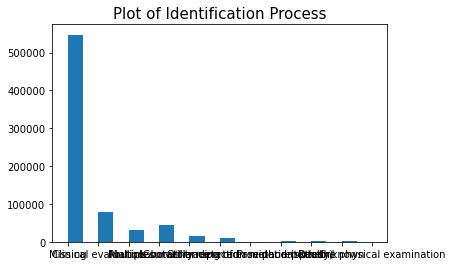

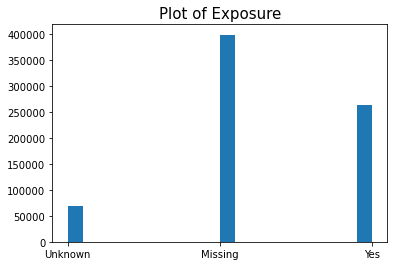

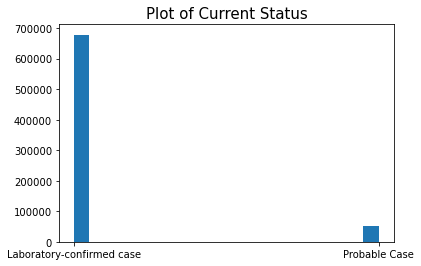

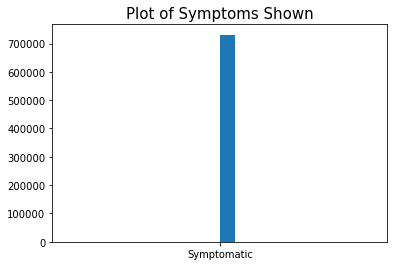

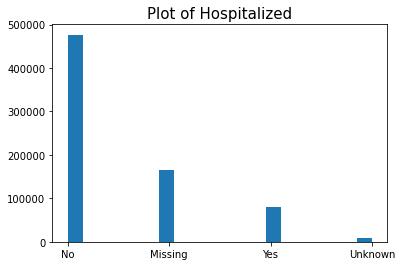

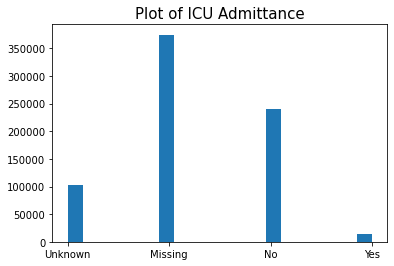

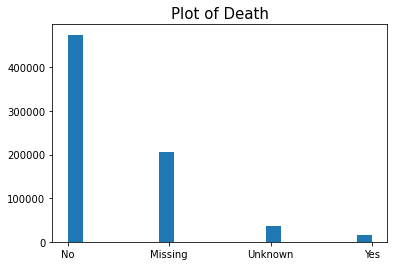

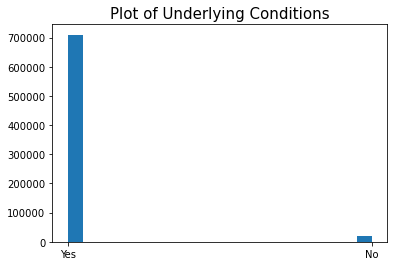

In [31]:
#Plot the histograms of all the variables (columns) in the new DataFrame
#Plot them all at once using a for loop. Try to add a unique title to a plot
for col in df.columns:
    plt.title("Plot of "+col,fontsize=15)
    plt.hist(df[col],bins=20)
    plt.show()

Based on above cleaning Missing and Unknown values in Sex, Ethinicity

## Identify outliers and bad data

In [32]:
df = df[(df.Sex != 'Unknown') & (df.Sex != 'Missing')]
df = df[(df.Ethinicity != 'Unknown') & (df.Ethinicity != 'Missing')]

In [33]:
size_cleaned = df.shape
print("The size of previous data was - {prev[0]} rows and the size of the new one is - {after[0]} rows".
      format(prev=size_orig, after=size_cleaned))

The size of previous data was - 32806678 rows and the size of the new one is - 683822 rows


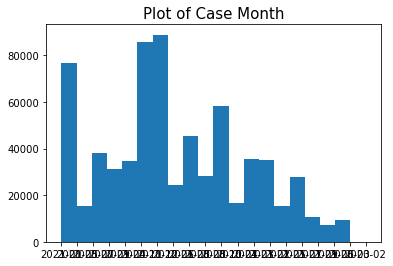

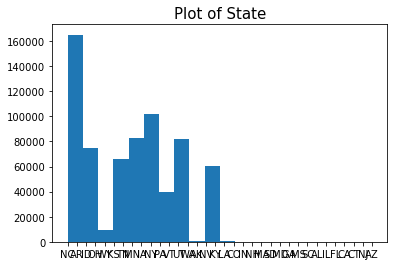

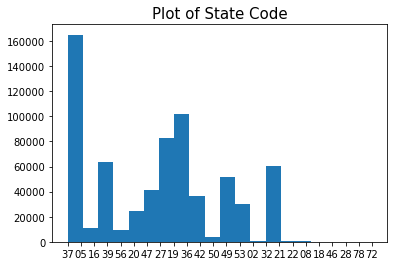

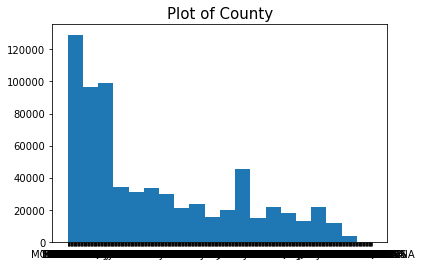

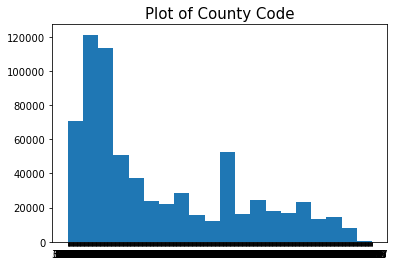

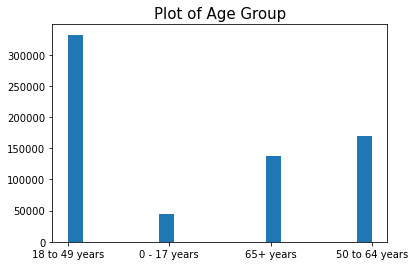

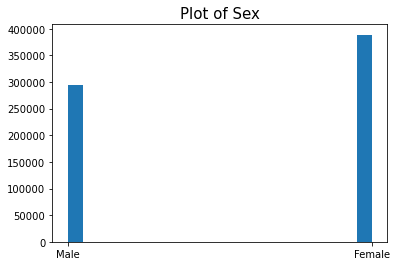

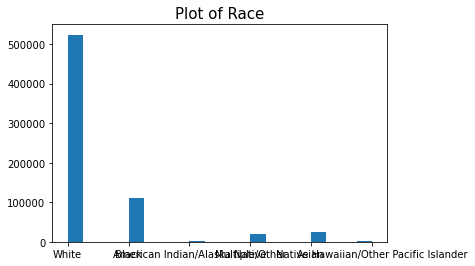

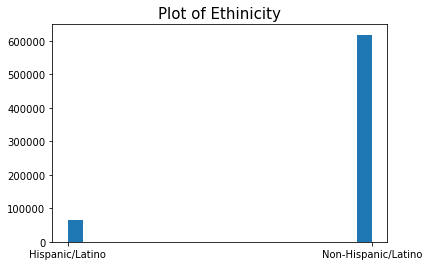

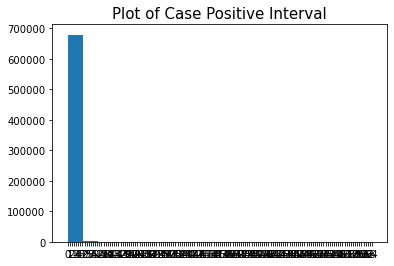

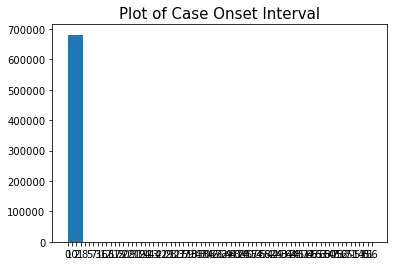

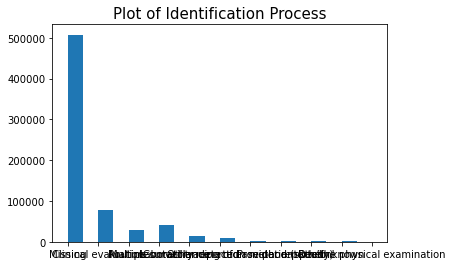

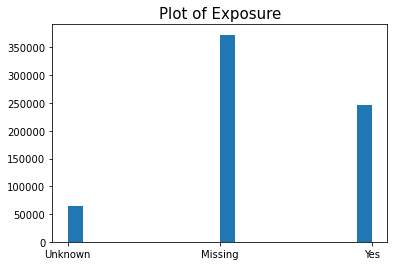

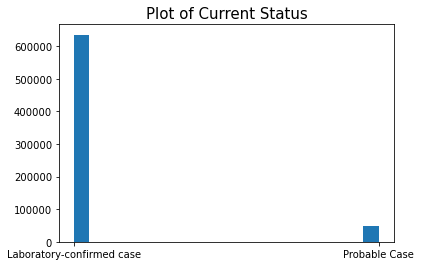

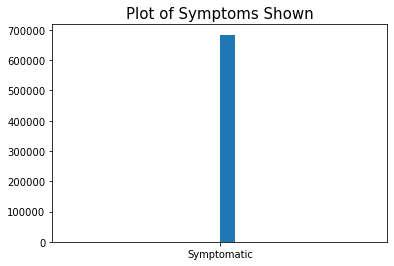

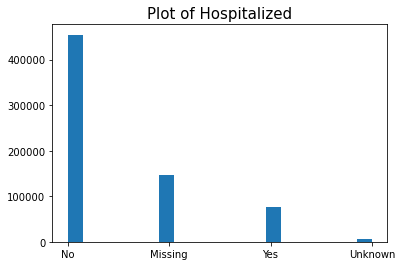

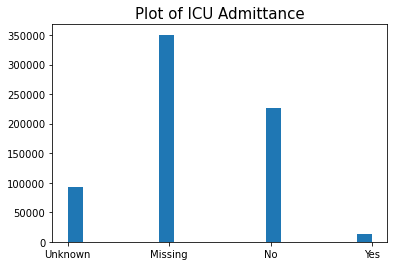

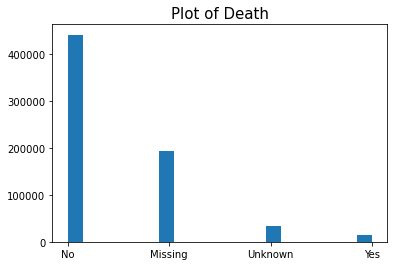

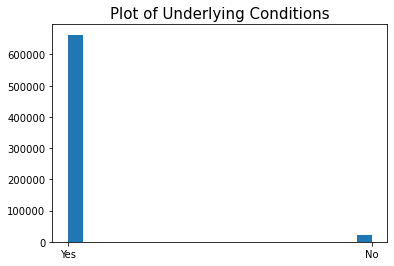

In [42]:
#Plot the histograms of all the variables (columns) in the new DataFrame
#Plot them all at once using a for loop. Try to add a unique title to a plot
for col in df.columns:
    plt.title("Plot of "+col,fontsize=15)
    plt.hist(df[col],bins=20)
    plt.show()